## project #7 submission | neural networks | dnn

### srikumar misra

### Problem Statement & Context: 
> Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. The ability to automatically transcribe an address number from a geo- located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the
location of the building it represents.

> In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). 

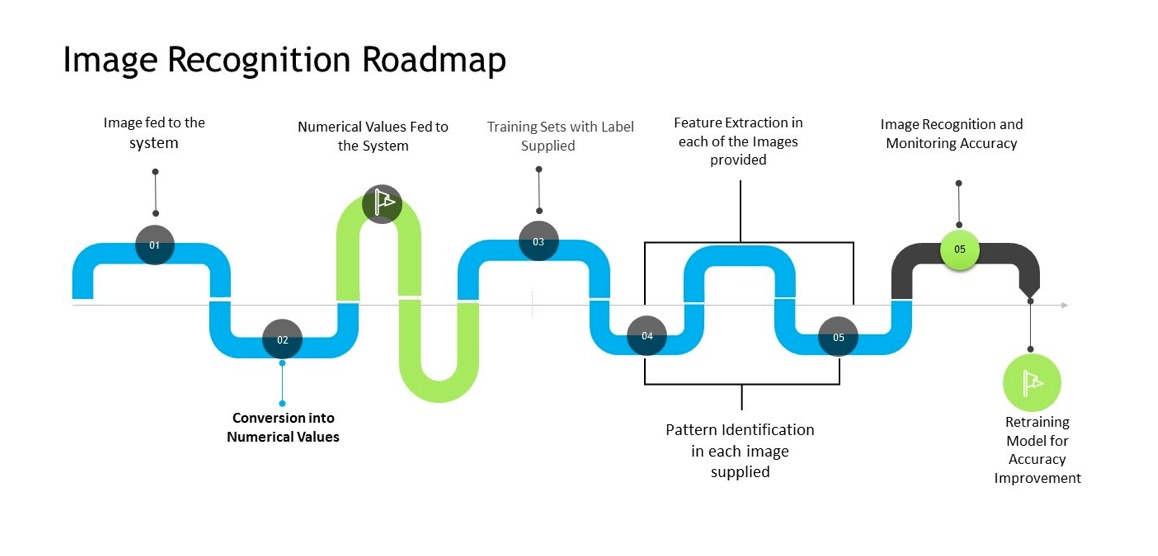

In [1]:
from IPython.display import Image
Image(filename='image.jpg', width=1050, height=350)

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
import seaborn as sns

Using TensorFlow backend.
/Users/sri/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sri/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sri/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/sri/opt/anaconda3/lib/python3.7/site-packag

## Load the dataset and explore parameters

In [3]:
import h5py
import numpy as np

h5f = h5py.File('/Users/sri/Box/AIML/JupyterPractice/Projects_GL/Project#7_NeuralNetworks/SVHN_single_grey1.h5', 'r')

X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

h5f.close()

In [4]:
X_train.shape

(42000, 32, 32)

In [5]:
y_train.shape

(42000,)

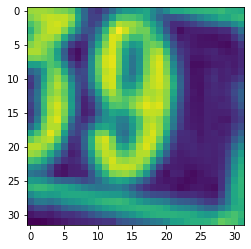

Label:  9


In [6]:
plt.imshow(X_train[199])    # show first number in the dataset
plt.show()
print('Label: ', y_train[199])

In [7]:
X_test.shape

(18000, 32, 32)

In [8]:
y_test.shape

(18000,)

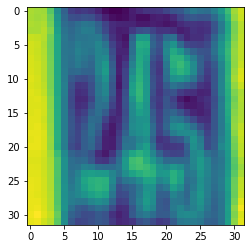

Label:  4


In [9]:
plt.imshow(X_test[8])    # show first number in the dataset
plt.show()
print('Label: ', y_test[8])

### ==> NOTE
> Training and testing datasets have 42000 and 18000 data
> The images have resolution of 32x32 pixels
> Reshape them for a 2d array

## Reshaping dataset | Encode target | Noramlize

In [10]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [11]:
X_train.shape

(42000, 1024)

In [12]:
y_train.shape

(42000,)

In [13]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 1024) (18000, 1024) (42000, 10) (18000, 10)


In [15]:
# normalize dataset
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_test /=255

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 1024) (18000, 1024) (42000, 10) (18000, 10)


## Basic MLP model
#### Try Sigmoid & ReLU activations

In [17]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [18]:
model = Sequential()

In [19]:
model.add(Dense(128, input_shape = (1024, )))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [20]:
opt = optimizers.Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
history = model.fit(X_train, y_train, batch_size = 100, validation_split = 0.2, epochs = 75, verbose = 1)


Train on 33600 samples, validate on 8400 samples
Epoch 1/75
33600/33600 [==============================] - 16s 481us/step - loss: 2.3012 - accuracy: 0.1060 - val_loss: 2.2718 - val_accuracy: 0.1281
Epoch 2/75
33600/33600 [==============================] - 8s 251us/step - loss: 1.9743 - accuracy: 0.2478 - val_loss: 1.8274 - val_accuracy: 0.3092
Epoch 3/75
33600/33600 [==============================] - 11s 337us/step - loss: 1.6500 - accuracy: 0.4113 - val_loss: 1.4546 - val_accuracy: 0.5019
Epoch 4/75
33600/33600 [==============================] - 15s 439us/step - loss: 1.4021 - accuracy: 0.5226 - val_loss: 1.3383 - val_accuracy: 0.5535
Epoch 5/75
33600/33600 [==============================] - 18s 522us/step - loss: 1.2865 - accuracy: 0.5718 - val_loss: 1.2626 - val_accuracy: 0.5763
Epoch 6/75
33600/33600 [==============================] - 12s 358us/step - loss: 1.1922 - accuracy: 0.6087 - val_loss: 1.2133 - val_accuracy: 0.6095
Epoch 7/75
33600/33600 [==============================] -

33600/33600 [==============================] - 16s 482us/step - loss: 0.7886 - accuracy: 0.7432 - val_loss: 0.9090 - val_accuracy: 0.7126
Epoch 55/75
33600/33600 [==============================] - 10s 305us/step - loss: 0.7820 - accuracy: 0.7442 - val_loss: 0.9120 - val_accuracy: 0.7138
Epoch 56/75
33600/33600 [==============================] - 8s 252us/step - loss: 0.7917 - accuracy: 0.7426 - val_loss: 0.9533 - val_accuracy: 0.7056
Epoch 57/75
33600/33600 [==============================] - 8s 237us/step - loss: 0.7792 - accuracy: 0.7471 - val_loss: 0.9219 - val_accuracy: 0.7096
Epoch 58/75
33600/33600 [==============================] - 7s 219us/step - loss: 0.7802 - accuracy: 0.7446 - val_loss: 0.9633 - val_accuracy: 0.6968
Epoch 59/75
33600/33600 [==============================] - 7s 216us/step - loss: 0.7857 - accuracy: 0.7436 - val_loss: 0.9588 - val_accuracy: 0.6970
Epoch 60/75
33600/33600 [==============================] - 7s 212us/step - loss: 0.7706 - accuracy: 0.7483 - val_los

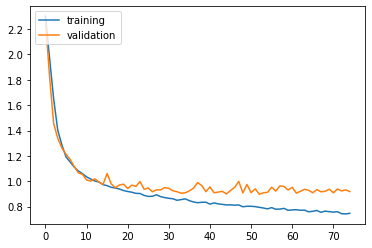

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()


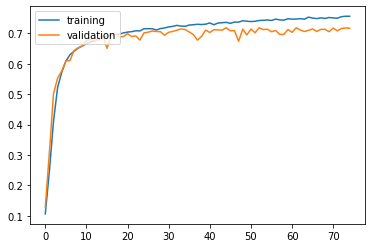

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [24]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 2s 122us/step


In [25]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7177222371101379


### ==> NOTE
> After trying several options of number of hidden layers and number of neurons, selected the above model structure and accuracy achieved with ReLU activation is 69%. This is expected from the basic model.

> Adam optimizer performed better, and learning rate of 0.001 was appropriate

> Accuracy only improves till about 50 epochs, and then only marginally for validation set

> Same model with Sigmoid activation had accuracy score much lower. Tanh was performing well

## Weight Initialization to improve model performance

In [26]:
model = Sequential()

In [27]:
model.add(Dense(128, input_shape = (1024, ), kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(128, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(32, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(10, kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [28]:
opt = optimizers.Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [29]:
history = model.fit(X_train, y_train, batch_size = 100, validation_split = 0.2, epochs = 50, verbose = 1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 16s 466us/step - loss: 2.2898 - accuracy: 0.1229 - val_loss: 2.2445 - val_accuracy: 0.1299
Epoch 2/50
33600/33600 [==============================] - 9s 266us/step - loss: 2.1906 - accuracy: 0.1729 - val_loss: 2.0848 - val_accuracy: 0.2306
Epoch 3/50
33600/33600 [==============================] - 8s 233us/step - loss: 1.8722 - accuracy: 0.3181 - val_loss: 1.6488 - val_accuracy: 0.4099
Epoch 4/50
33600/33600 [==============================] - 8s 251us/step - loss: 1.5207 - accuracy: 0.4749 - val_loss: 1.3750 - val_accuracy: 0.5456
Epoch 5/50
33600/33600 [==============================] - 10s 290us/step - loss: 1.3310 - accuracy: 0.5513 - val_loss: 1.4075 - val_accuracy: 0.5185
Epoch 6/50
33600/33600 [==============================] - 9s 269us/step - loss: 1.2226 - accuracy: 0.5956 - val_loss: 1.2527 - val_accuracy: 0.5927
Epoch 7/50
33600/33600 [==============================] - 9s 

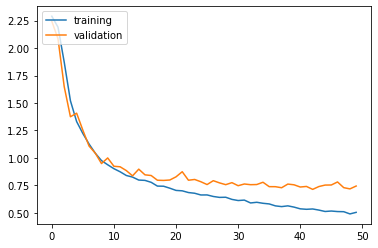

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

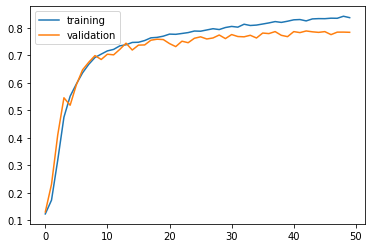

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [32]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 2s 118us/step


In [33]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7845555543899536


### ==> NOTE
> As we are using ReLU, therfore have taken he normal for weight initialization

> With weight initialization, model performnace improved to 79%

## Batch Normalization to improve model performance

In [34]:
from keras.layers import BatchNormalization

In [35]:
model = Sequential()

In [36]:
model.add(Dense(128, input_shape = (1024, ), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(128, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [37]:
opt = optimizers.Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [38]:
history = model.fit(X_train, y_train, batch_size = 100, validation_split = 0.2, epochs = 50, verbose = 1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 22s 662us/step - loss: 1.6962 - accuracy: 0.4246 - val_loss: 1.8141 - val_accuracy: 0.3795
Epoch 2/50
33600/33600 [==============================] - 14s 421us/step - loss: 1.0898 - accuracy: 0.6546 - val_loss: 1.6171 - val_accuracy: 0.4592
Epoch 3/50
33600/33600 [==============================] - 14s 426us/step - loss: 0.9211 - accuracy: 0.7058 - val_loss: 1.9305 - val_accuracy: 0.4761
Epoch 4/50
33600/33600 [==============================] - 14s 415us/step - loss: 0.8258 - accuracy: 0.7373 - val_loss: 1.2788 - val_accuracy: 0.5868
Epoch 5/50
33600/33600 [==============================] - 14s 428us/step - loss: 0.7585 - accuracy: 0.7603 - val_loss: 1.2236 - val_accuracy: 0.5892
Epoch 6/50
33600/33600 [==============================] - 14s 421us/step - loss: 0.7062 - accuracy: 0.7763 - val_loss: 1.2511 - val_accuracy: 0.5863
Epoch 7/50
33600/33600 [==============================] -

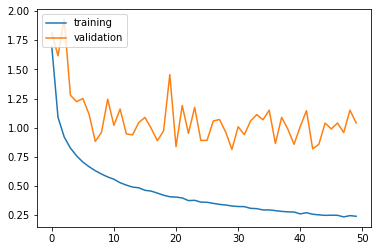

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

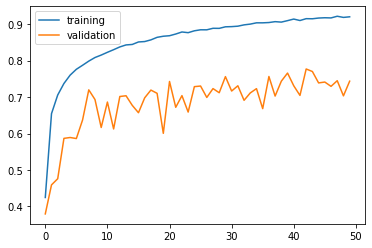

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [41]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 5s 253us/step


In [42]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7464444637298584


### ==> NOTE
> Batch Normalization didn't help improve model performance - in fact it dropped to 75%. Graph shows model is over fitting significantly and also, validation set is fluctuating.

> We will try Dropout next to see if overfitting can be addressed, and if model performnace can be bettered

## Trying Dropout for Regularization to avoid overfitting

In [43]:
model = Sequential()

In [44]:
from keras.layers import Dropout

model.add(Dense(128, input_shape = (1024, ), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(128, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(32, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(10, kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [45]:
opt = optimizers.Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 100, validation_split = 0.2, epochs = 50, verbose = 1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 40s 1ms/step - loss: 2.1339 - accuracy: 0.2354 - val_loss: 2.0981 - val_accuracy: 0.2796
Epoch 2/50
33600/33600 [==============================] - 25s 732us/step - loss: 1.5072 - accuracy: 0.4826 - val_loss: 1.4385 - val_accuracy: 0.5192
Epoch 3/50
33600/33600 [==============================] - 20s 605us/step - loss: 1.2621 - accuracy: 0.5932 - val_loss: 1.4443 - val_accuracy: 0.5012
Epoch 4/50
33600/33600 [==============================] - 20s 585us/step - loss: 1.1284 - accuracy: 0.6408 - val_loss: 1.0968 - val_accuracy: 0.6585
Epoch 5/50
 6400/33600 [====>.........................] - ETA: 16s - loss: 1.0670 - accuracy: 0.6641

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)

In [ ]:
print('Test accuracy: ', results[1])

### ==> NOTE
> Dropout reduced overfiting as can be seen fom the graphs, and performance improved to 74%. Though model is still over fitting as validation set is performing lower than training

> Validation set is also fluctuating

## Classification Accuracy Metrics
### Confusion Matrix | Precision - Recall Scores

> We will use the model with weight initialization as its performnace was optimum

In [ ]:
# using the  final model
predictions = model.predict(X_test)
c_matrix= metrics.confusion_matrix(y_test.argmax(axis=-1),predictions.argmax(axis=-1))

In [ ]:
print ("Confusion Matrix")
print("------------------")
print (c_matrix)

In [ ]:
class_report = metrics.classification_report(y_test.argmax(axis=-1),predictions.argmax(axis=-1))
print ("Classification Report")
print("------------------------")
print (class_report)

## ==> FINAL OBSERVATIONS

> As we are deploying a DNN model on an image recognition problem (as opposed to CNN) - accuracy achieved by the model is moderate at c79%

> From confusion matrix and PR scores, taking composite f1 score: For some classes like 0, 1, 2, 4 and 7 - the model is performing better in classification, whereas in some classes like 3 and 9 the model is not.  

